# 📊 Caso de Negocio: Promoción de Servicios Financieros en el Sector Bancario

## 🌐 Contexto del Problema

**Banco Avanza** es una entidad financiera que ha implementado diversas estrategias de **marketing** para promover la apertura de nuevas cuentas de ahorro. El equipo de marketing ha estado invirtiendo en diferentes canales, como:

- 📧 **Email marketing personalizado**
- 📝 **Seminarios financieros**
- 📺 **Publicidad en medios digitales**
- 🤝 **Colaboraciones con influencers financieros**: grandes, medianos, pequeños, y micro-influencers para llegar a diferentes segmentos de audiencia.

Además, han colaborado con **expertos financieros** para llegar a audiencias específicas. Sin embargo, el equipo directivo está preocupado porque, a pesar de estas iniciativas, el **crecimiento en la apertura de nuevas cuentas** no ha alcanzado las expectativas.

El **director de marketing** desea saber qué estrategias están funcionando mejor y si las colaboraciones con expertos financieros de diferentes niveles (grandes, medianos, pequeños) están impactando significativamente las ventas de productos financieros. El objetivo es identificar las estrategias más efectivas y optimizar la **inversión publicitaria** para maximizar la apertura de cuentas de ahorro.

## 🧐 Tu Rol: Análisis del Rendimiento

Como parte del **equipo de analistas de datos** del Banco Avanza, se te ha asignado la tarea de:

1. 📈 **Analizar las causas** detrás del rendimiento de estas estrategias de marketing.
2. 💡 Proporcionar **recomendaciones basadas en datos** para mejorar los resultados.

La meta es ayudar a la dirección a **maximizar el rendimiento** de la inversión en marketing, mejorando la eficiencia de las estrategias y asegurando un crecimiento sostenido en la apertura de cuentas de ahorro.

Importar los modules requeridos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

## 1. Importar una base al Jupyter Notebook con pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Leer base de datos con pandas
file_path = "/content/drive/MyDrive/UDLA-Analitica predictiva/2024 Reconstruccion/Notebooks/udla-aanlitica-pred-2024/S1_Regresion_Lineal/2.Postsesion/dataset.csv"
df = pd.read_csv(file_path)
df

,Pub_Medios_Digitales,Seminarios,email_marketing,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


# OPCIÓN 1: LOW-CODE

## 2. Descriptivos

In [4]:
# Mostrar las primeras filas del DataFrame
df.head(5)

,Pub_Medios_Digitales,Seminarios,email_marketing,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pub_Medios_Digitales  4562 non-null   float64
 1   Seminarios            4568 non-null   float64
 2   email_marketing       4566 non-null   float64
 3   Influencer            4572 non-null   object 
 4   Sales                 4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
# Descripción estadística de las variables numéricas
df.describe()

,Pub_Medios_Digitales,Seminarios,email_marketing,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [7]:
df.describe(include = 'object')

,Influencer
count,4572
unique,4
top,Mega
freq,1158


## 3. Identificación de Datos Perdidos

In [8]:
df.isna().sum()

,0
Pub_Medios_Digitales,10
Seminarios,4
email_marketing,6
Influencer,0
Sales,6


## 4. Evaluación de Datos Atípicos (Outliers)

In [9]:
# Identificación de valores atípicos (outliers)
valores_atipicos = {}

variables_numericas = df.select_dtypes(include=['number']).columns

for columna in variables_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna].count()
print("Valores Atípicos:\n", valores_atipicos)


Valores Atípicos:
 {'Pub_Medios_Digitales': 0, 'Seminarios': 1, 'email_marketing': 28, 'Sales': 0}


## 5.Corrección de Datos Perdidos y Atípicos

In [10]:
# Imputar valores perdidos con la mediana
for columna in variables_numericas:
    valor_mediana = df[columna].median()
    df[columna].fillna(valor_mediana, inplace=True)

# Aplicar winsorización para tratar los valores atípicos (outliers)
from scipy.stats.mstats import winsorize

df['Seminarios'] = winsorize(df['Seminarios'], limits=[0.01, 0.01])
df['email_marketing'] = winsorize(df['email_marketing'], limits=[0.01, 0.01])

# Verificar nuevamente los datos perdidos y valores atípicos
datos_perdidos_despues = df.isnull().sum()
valores_atipicos_despues = {}
for columna in variables_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos_despues[columna] = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna].count()

print("Datos Perdidos Después de la Corrección:\n", datos_perdidos_despues)
print("Valores Atípicos Después de la Corrección:\n", valores_atipicos_despues)


Datos Perdidos Después de la Corrección:
 Pub_Medios_Digitales    0
Seminarios              0
email_marketing         0
Influencer              0
Sales                   0
dtype: int64
Valores Atípicos Después de la Corrección:
 {'Pub_Medios_Digitales': 0, 'Seminarios': 0, 'email_marketing': 0, 'Sales': 0}


## 6.Visualización de Distribuciones

---



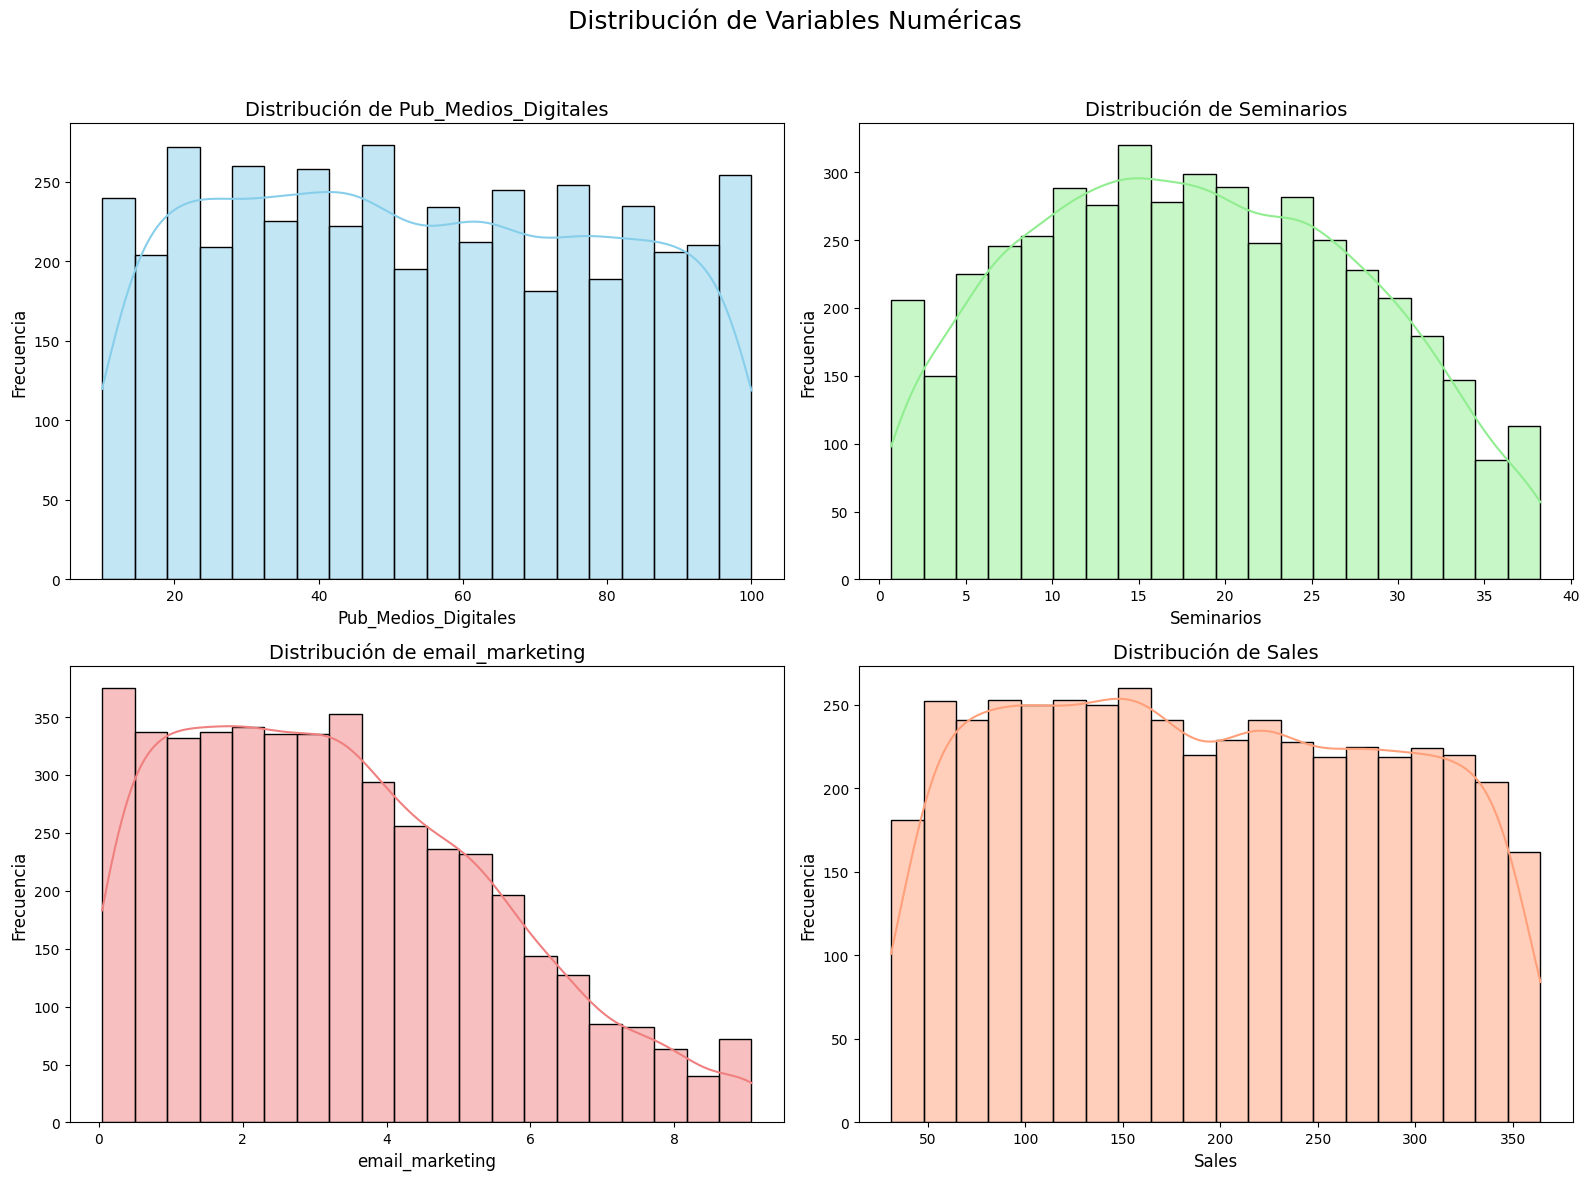

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
columns = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing', 'Sales']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]], bins=20, color=colors[i], kde=True, ax=ax)
    ax.set_title(f'Distribución de {columns[i]}', fontsize=14)
    ax.set_xlabel(columns[i], fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

plt.suptitle('Distribución de Variables Numéricas', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [12]:
import plotly.express as px

# Contar los tipos de influencers
influencer_counts = df['Influencer'].value_counts().reset_index()
influencer_counts.columns = ['Tipo de Influencer', 'Cantidad']

# Crear gráfico de pastel con Plotly
fig = px.pie(influencer_counts, names='Tipo de Influencer', values='Cantidad',
             title='Distribución de Tipos de Influencers',
             color_discrete_sequence=px.colors.qualitative.Set2)

# Mostrar gráfico
fig.update_traces(textinfo='percent+label', pull=[0.05, 0, 0, 0], hoverinfo='label+percent+value')
fig.update_layout(width=800, height=600)
fig.show()


In [13]:
import plotly.express as px

# Datos de las columnas a analizar
columns = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing', 'Sales']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Crear gráficos de boxplot con Plotly para cada columna, cada una con un color diferente
for i, col in enumerate(columns):
    fig = px.box(df, y=col, title=f'Boxplot de {col}', color_discrete_sequence=[colors[i]])
    fig.update_layout(yaxis_title='Valor', width=800, height=500)
    fig.show()



In [14]:
import plotly.express as px

# Seleccionar las columnas a analizar
columns_to_plot = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing']

# Crear DataFrame solo con las columnas a analizar
df_melted = df[columns_to_plot].melt(var_name='Estrategia de Marketing', value_name='Valor')

# Crear el boxplot horizontal para las tres variables
fig = px.box(df_melted, y='Estrategia de Marketing', x='Valor', color='Estrategia de Marketing',
             title='Boxplot Comparativo de Estrategias de Marketing (Horizontal)',
             color_discrete_sequence=['skyblue', 'lightgreen', 'lightcoral'])

# Configurar el layout
fig.update_layout(xaxis_title='Valor', yaxis_title='Estrategia de Marketing', width=900, height=600)
fig.show()



In [15]:
import plotly.express as px

# Seleccionar las columnas numéricas y la columna categórica
columns_to_plot = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing', 'Sales']
df_subset = df[columns_to_plot + ['Influencer']]

# Crear gráfico de dispersión matricial con Plotly
fig = px.scatter_matrix(df_subset, dimensions=columns_to_plot, color='Influencer',
                        title='Relación entre Variables Numéricas',
                        color_discrete_sequence=px.colors.qualitative.Pastel)

# Configurar el layout
fig.update_layout(width=900, height=900)
fig.show()


## 6. Correlaciones entre Variables Numéricas

In [16]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

columnas_seleccionadas = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing', 'Sales']

# Seleccionar solo las columnas numéricas deseadas
numeric_df = df[columnas_seleccionadas]

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear una copia de la matriz de correlación con solo la diagonal inferior
lower_triangle_matrix = correlation_matrix.copy()
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if j > i:
            lower_triangle_matrix.iloc[i, j] = np.nan

# Crear un gráfico de calor de la matriz de correlación con Plotly
fig = go.Figure()

# Añadir el Heatmap
fig.add_trace(go.Heatmap(
    z=lower_triangle_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlación")
))

# Crear listas para las anotaciones de la diagonal inferior
x_vals = []
y_vals = []
texts = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1):
        if not np.isnan(lower_triangle_matrix.iloc[i, j]):
            x_vals.append(correlation_matrix.columns[j])
            y_vals.append(correlation_matrix.columns[i])
            texts.append(f'{correlation_matrix.values[i, j]:.2f}')

# Añadir las anotaciones como un solo Scatter
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    text=texts,
    mode='text',
    textfont=dict(
        size=12,
        color='white'
    )
))

# Configurar el layout del gráfico
fig.update_layout(
    title='Mapa de Calor de Correlaciones (Diagonal Inferior)',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=800,
    height=700
)

# Mostrar el gráfico
fig.show()


## 7.Correción de las Variables Independientes

In [17]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [18]:
df[var_cualitativas]

,Influencer
0,Mega
1,Mega
2,Mega
3,Mega
4,Micro
...,...
4567,Micro
4568,Nano
4569,Micro
4570,Macro


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [21]:
df.Influencer = labelencoder.fit_transform(df.Influencer)
df

,Pub_Medios_Digitales,Seminarios,email_marketing,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,0,253.610411


In [22]:
df[var_cualitativas].astype("object")

,Influencer
0,1
1,1
2,1
3,1
4,2
...,...
4567,2
4568,3
4569,2
4570,0


In [23]:
df["Influencer"]=df["Influencer"].astype("object")

In [24]:
df["Influencer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4572 entries, 0 to 4571
Series name: Influencer
Non-Null Count  Dtype 
--------------  ----- 
4572 non-null   object
dtypes: object(1)
memory usage: 35.8+ KB


## 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo, por ejemplo:
- ¿Bajo cuántos datos fue obtenido el modelo?
- ¿Cuál es su grado de ajuste?,
- ¿Hay variables significativas?
- ¿Cuáles son las variables no- significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores

In [25]:
regresion = ols("Sales ~ Pub_Medios_Digitales + Seminarios + email_marketing + Influencer", data=df)
results = regresion.fit()

In [26]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.134e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:33:47   Log-Likelihood:                -15758.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4565   BIC:                         3.158e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1773 

¿Bajo cuántos datos fue obtenido el modelo?

In [27]:
num_datos = len(df)
print(f"Bajo {num_datos} datos fue obtenido el modelo.")

Bajo 4572 datos fue obtenido el modelo.


¿Cuál es su grado de ajuste?

In [28]:
# Assuming 'results' is a regression model result object
# and has an attribute or method to access the R-squared value
r2 = results.rsquared  # Replace with the correct way to get R-squared from 'results'
print(f"El grado de ajuste (R-squared) es: {r2}")

El grado de ajuste (R-squared) es: 0.9933363294249214


¿Hay variables significativas?

¿Cuáles son las variables no-significativas?

Elimine las variables no-significativas y ejecute el modelo nuevamente

In [29]:
regresion = ols("Sales ~ Pub_Medios_Digitales + Seminarios", data=df)
results = regresion.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.403e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:33:48   Log-Likelihood:                -15760.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4569   BIC:                         3.154e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1758 

## 9. Verifique los supuestos de la regresión lineal


*   MULTICOLINEALIDAD




In [30]:
# Convertimos a entero nuevamente la variable influencer para poder calcular el VIF
df['Influencer'] = df['Influencer'].astype('int64')

Importamos de la librería statsmodel el VIF:

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
#Creamos un DataFrame que no incluya la varible dependiente
df2=df[df.columns.difference(['Sales'])]
df2

,Influencer,Pub_Medios_Digitales,Seminarios,email_marketing
0,1,16.0,6.566231,2.907983
1,1,13.0,9.237765,2.409567
2,1,41.0,15.886446,2.913410
3,1,83.0,30.020028,6.922304
4,2,15.0,8.437408,1.405998
...,...,...,...,...
4567,2,26.0,4.472360,0.717090
4568,3,71.0,20.610685,6.545573
4569,2,44.0,19.800072,5.096192
4570,0,71.0,17.534640,1.940873


In [33]:
# Verificamos el tipo de variables
df2.dtypes

,0
Influencer,int64
Pub_Medios_Digitales,float64
Seminarios,float64
email_marketing,float64


Todas las variables son numericas por lo que es posible calcular el VIF:

In [34]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

                feature        VIF
0            Influencer   2.101803
1  Pub_Medios_Digitales  19.227390
2            Seminarios  21.131068
3       email_marketing   5.094899


In [35]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Seminarios'])

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Seminarios'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Seminarios'])].columns))]

print(vif_data)

                feature       VIF
0            Influencer  2.101582
1  Pub_Medios_Digitales  5.146130
2       email_marketing  4.448131


Listo, el VIF se encuentra en un estado aceptable para proseguir. De esta manera ejecutamos nuestro nuevo modelo que ya estaria cumpliendo el supuesto de no multicolinealidad perfecta.

In [36]:
df['Influencer'] = df['Influencer'].astype('object')

In [37]:
regresion2 = ols("Sales ~ Pub_Medios_Digitales", data=df)
results2 = regresion2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.759e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:33:48   Log-Likelihood:                -15776.
No. Observations:                4572   AIC:                         3.156e+04
Df Residuals:                    4570   BIC:                         3.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2923 

### 9.1. Verifcación de supuestos en el modelo definitivo



*   **LINEALIDAD**


- **HOMOCEDASTICIDAD**

In [38]:
y_pred=results2.predict()

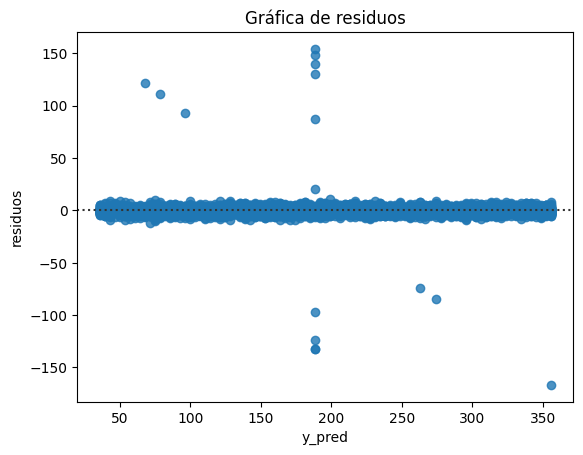

In [39]:
sns.residplot(x=y_pred, y=results2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")
plt.show()

El test de Breush Pagan se utiliza para determinar la heterocedasticidad en un modelo de regresión lineal, ya que analiza si la varianza estimada de los residuos de una regresión dependen de los valores de las variables independientes.

La hipótesis nula de este test es:

H0: Existe homocedasticidad

H1: La homocedasticidad no está presente, por lo que existe heterocedasticidad

In [40]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results2.resid, results2.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 0.021526158813572227),
 ('p-value', 0.8833546446045236),
 ('f-value', 0.021516843602810073),
 ('f p-value', 0.8833861754510142)]

El test de Breusch-Pagan nos ayuda a evaluar si la varianza de los residuos es constante a lo largo de los valores ajustados. En este caso, el p-value obtenido es mayor a 0.05, lo que indica que no podemos rechazar la hipótesis nula de homocedasticidad.

Esto significa que, según este test, no hay evidencia suficiente para afirmar que la varianza de los residuos cambia significativamente a medida que cambian los valores ajustados. En otras palabras, el supuesto de homocedasticidad parece cumplirse en nuestro modelo.

Si la homocedasticidad no se cumpliera, podríamos considerar transformaciones de la variable dependiente o utilizar métodos de regresión robusta a la heterocedasticidad.                

- **NORMALIDAD DE RESIDUOS**

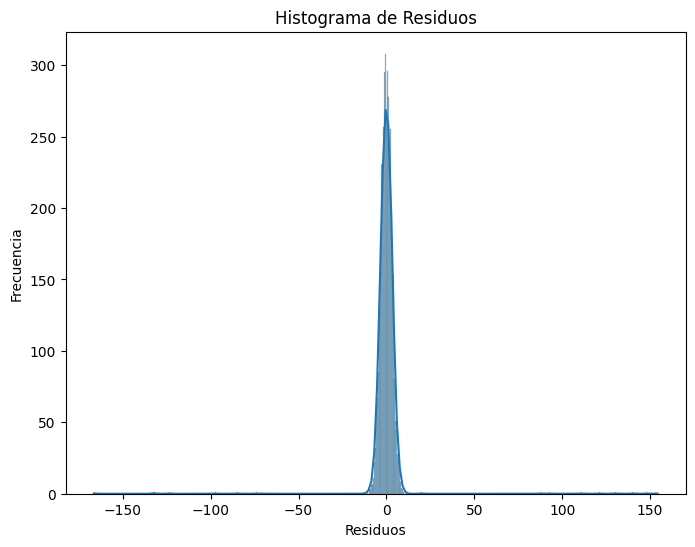

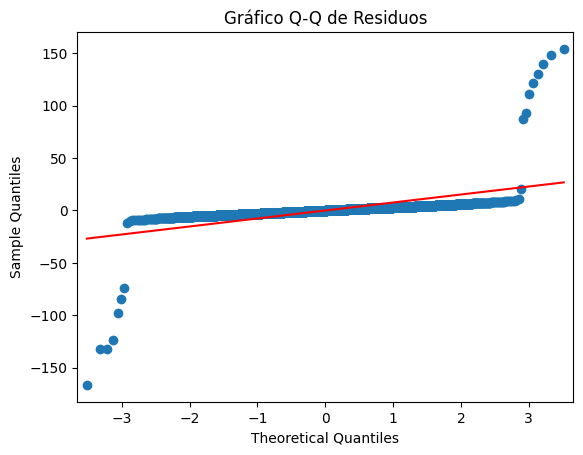

Estadístico: 0.3031299808493958
P-valor: 3.1402328844952443e-85


In [41]:
# 3. Normalidad de los residuos:
# Histograma de los residuos
plt.figure(figsize=(8,6))
sns.histplot(results2.resid, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# Gráfico Q-Q
sm.qqplot(results2.resid, line='s')
plt.title('Gráfico Q-Q de Residuos')
plt.show()

# Test de Shapiro-Wilk
from scipy.stats import shapiro
statistic, p_value = shapiro(results2.resid)
print('Estadístico:', statistic)
print('P-valor:', p_value)


El supuesto de normalidad de los residuos es importante para la validez de las pruebas de hipótesis y los intervalos de confianza en la regresión lineal.

**Histograma de Residuos:** En este caso, el histograma de los residuos muestra una forma aproximadamente simétrica y acampanada, lo cual sugiere que los residuos podrían seguir una distribución normal.

**Gráfico Q-Q:** El gráfico Q-Q compara los cuantiles de los residuos con los cuantiles teóricos de una distribución normal. Si los residuos siguen una distribución normal, los puntos en el gráfico deberían estar cerca de la línea diagonal. En nuestro caso, la mayoría de los puntos están cerca de la línea, pero hay algunos puntos en los extremos que se alejan ligeramente. Esto podría indicar una ligera desviación de la normalidad en las colas de la distribución.

**Test de Shapiro-Wilk:** El test de Shapiro-Wilk es una prueba estadística formal para evaluar la normalidad de los datos. Un p-valor mayor a 0.05 indica que no hay suficiente evidencia para rechazar la hipótesis nula de normalidad. En nuestro caso, el p-valor obtenido es mayor a 0.05, lo que sugiere que no podemos rechazar la hipótesis de normalidad de los residuos.

**Conclusión:** A pesar de algunas ligeras desviaciones de la normalidad observadas en el histograma y el gráfico Q-Q, el test de Shapiro-Wilk y la forma general del histograma sugieren que los residuos podrían seguir una distribución aproximadamente normal. Esto indica que, en general, el supuesto de normalidad de los residuos parece cumplirse en nuestro modelo.
Si la normalidad de los residuos no se cumpliera de manera significativa, podríamos considerar transformaciones de la variable dependiente o utilizar métodos de regresión robusta que no asuman normalidad de los residuos.


## 10. Modelo de regresión Definitivo

Con el modelo definitivo todos los supuestos se cumplieron tanto con las pruebas gráficas como con las pruebas estadísticas, de esta manera fue elegido como modelo final para explicar las ventas. El modelo final paso de ser una regresión múltiple a una regresión simple por problemas encontrados en el proceso de modelación:

In [42]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.759e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:33:51   Log-Likelihood:                -15776.
No. Observations:                4572   AIC:                         3.156e+04
Df Residuals:                    4570   BIC:                         3.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2923 

Con nuestro modelo final hemos llegado a capturar el 75.4% de la variabilidad en las ventas mediante el presupuesto de promociones en Radio. Es decir, el incremento de un millón de dólares adicional al presupuesto en Radio incrementaría las ventas en 8.4155 millones. Si dicho presupuesto fuera nulo, la ventas se establecerían en un nivel de 39.8202 millones.  

## 11. Valores Predichos vs Valores Reales

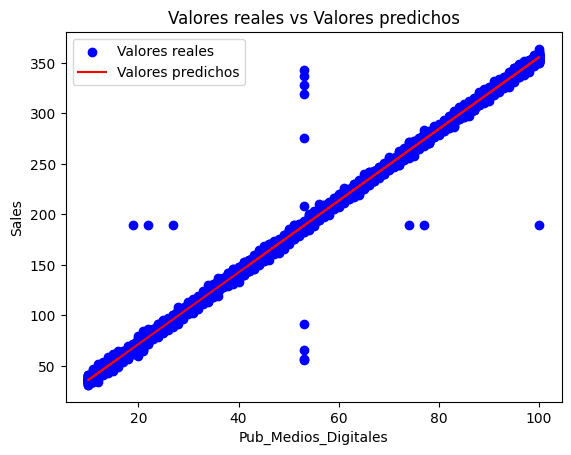

In [43]:
plt.scatter(df.Pub_Medios_Digitales, df.Sales, color='blue', label='Valores reales')
plt.plot(df.Pub_Medios_Digitales, y_pred, color='red', label='Valores predichos')

plt.xlabel('Pub_Medios_Digitales')
plt.ylabel('Sales')
plt.title('Valores reales vs Valores predichos')
plt.legend()
plt.show()

## 12. Ejecución del modelo enfoque de ciencia de datos

In [44]:
df.head()

,Pub_Medios_Digitales,Seminarios,email_marketing,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
features = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing', 'Influencer']
X = df[features]
y = df['Sales']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Imprimir los coeficientes y el intercepto
print(f"Intercepto: {regressor.intercept_}")
print(f"Coeficientes: {regressor.coef_}")

# Evaluar el modelo con los datos de prueba
score = regressor.score(X_test, y_test)
print(f"Puntaje del modelo (R^2): {score}")

Intercepto: -0.11689843225033769
Coeficientes: [3.51074204 0.13318502 0.07645718 0.10363499]
Puntaje del modelo (R^2): 0.9921648416767637


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predecir los valores de Sales para el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular los errores
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir los resultados
print(f"Error Medio Absoluto (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio Porcentual (MAPE): {mape:.2f}%")

# Imprimir el R^2 (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)
print(f"Puntaje del modelo (R^2): {r2:.2f}")


Error Medio Absoluto (MAE): 2.84
Error Cuadrático Medio (MSE): 65.39
Raíz del Error Cuadrático Medio (RMSE): 8.09
Error Absoluto Medio Porcentual (MAPE): 2.00%
Puntaje del modelo (R^2): 0.99


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Definir las columnas numéricas y categóricas
numeric_features = ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing']
categorical_features = ['Influencer']

# Crear el ColumnTransformer para aplicar StandardScaler solo a las columnas numéricas
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

# Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_train_scaled = column_transformer.fit_transform(X_train)
X_test_scaled = column_transformer.transform(X_test)


In [51]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
predicciones_train_std = modelo_regresion_std.predict(X_train_scaled)
predicciones_test_std = modelo_regresion_std.predict(X_test_scaled)

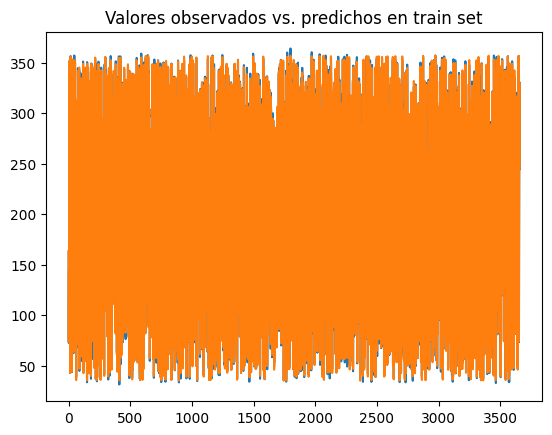

In [53]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

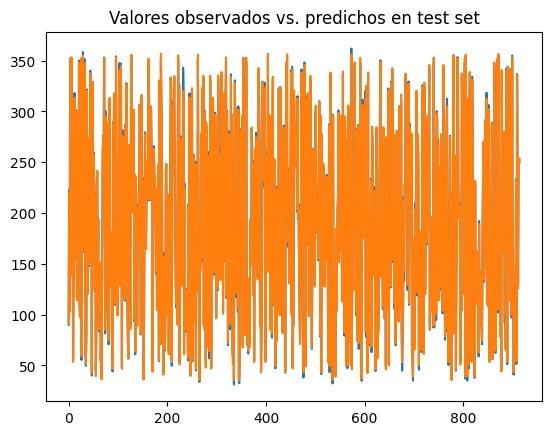

In [54]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [55]:
# Nombres de las características (asegurándote de incluir los nombres después de escalado y codificación)
feature_names = numeric_features + ['Influencer']

# Imprimir la importancia de cada variable explicativa
importancia = modelo_regresion_std.coef_

for i, v in enumerate(importancia):
    print(f'Variable explicativa: {feature_names[i]}, Score: {v:.5f}')


Variable explicativa: Pub_Medios_Digitales, Score: 91.97338
Variable explicativa: Seminarios, Score: 1.28439
Variable explicativa: email_marketing, Score: 0.16657
Variable explicativa: Influencer, Score: 0.10363


In [56]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y prueba
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

In [57]:
linear_model.coef_

array([3.51074204, 0.13318502, 0.07645718, 0.10363499])

In [58]:
# Evaluar el modelo de regresión lineal en entrenamiento y prueba
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)
mae_train_linear = mean_absolute_error(y_train, y_pred_train_linear)
mae_test_linear = mean_absolute_error(y_test, y_pred_test_linear)
mape_train_linear = mean_absolute_percentage_error(y_train, y_pred_train_linear)
mape_test_linear = mean_absolute_percentage_error(y_test, y_pred_test_linear)
r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)
print(f"Regresión Lineal - Entrenamiento: MSE: {mse_train_linear}, MAE: {mae_train_linear}, MAPE: {mape_train_linear}, R2: {r2_train_linear}")
print(f"Regresión Lineal - Prueba: MSE: {mse_test_linear}, MAE: {mae_test_linear}, MAPE: {mape_test_linear}, R2: {r2_test_linear}")


Regresión Lineal - Entrenamiento: MSE: 55.81852539548062, MAE: 2.8206612789864374, MAPE: 0.020810107523036886, R2: 0.9936118978942068
Regresión Lineal - Prueba: MSE: 65.39322022442475, MAE: 2.84050001099713, MAPE: 0.020009148340976935, R2: 0.9921648416767637


In [59]:
# Optimización de hiperparámetros para Ridge
ridge_params = {'alpha': np.logspace(-3, 3, 50)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# Mejor modelo Ridge
y_pred_train_ridge = ridge_grid.best_estimator_.predict(X_train)
y_pred_test_ridge = ridge_grid.best_estimator_.predict(X_test)

In [60]:
ridge_grid

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='r2')

In [61]:
# Evaluar el mejor modelo Ridge en entrenamiento y prueba
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mape_train_ridge = mean_absolute_percentage_error(y_train, y_pred_train_ridge)
mape_test_ridge = mean_absolute_percentage_error(y_test, y_pred_test_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f"Ridge Optimizado - Entrenamiento: MSE: {mse_train_ridge}, MAE: {mae_train_ridge}, MAPE: {mape_train_ridge}, R2: {r2_train_ridge}")
print(f"Ridge Optimizado - Prueba: MSE: {mse_test_ridge}, MAE: {mae_test_ridge}, MAPE: {mape_test_ridge}, R2: {r2_test_ridge}")

Ridge Optimizado - Entrenamiento: MSE: 55.82136529723803, MAE: 2.8285837342801807, MAPE: 0.020869663625061263, R2: 0.9936115728841448
Ridge Optimizado - Prueba: MSE: 65.3966283990773, MAE: 2.847204691977872, MAPE: 0.02006021030843741, R2: 0.992164433322688


In [62]:
# Optimización de hiperparámetros para Lasso
lasso_params = {'alpha': np.logspace(-3, 3, 50)}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

# Mejor modelo Lasso
y_pred_train_lasso = lasso_grid.best_estimator_.predict(X_train)
y_pred_test_lasso = lasso_grid.best_estimator_.predict(X_test)

In [63]:
lasso_grid

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='r2')

In [64]:

# Evaluar el mejor modelo Lasso en entrenamiento y prueba
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mape_train_lasso = mean_absolute_percentage_error(y_train, y_pred_train_lasso)
mape_test_lasso = mean_absolute_percentage_error(y_test, y_pred_test_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

# Crear un DataFrame con todos los resultados de las métricas
error_metrics = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Regresión Lineal', 'Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Conjunto': ['Entrenamiento', 'Prueba', 'Entrenamiento', 'Prueba', 'Entrenamiento', 'Prueba'],
    'MSE': [mse_train_linear, mse_test_linear, mse_train_ridge, mse_test_ridge, mse_train_lasso, mse_test_lasso],
    'MAE': [mae_train_linear, mae_test_linear, mae_train_ridge, mae_test_ridge, mae_train_lasso, mae_test_lasso],
    'MAPE': [mape_train_linear, mape_test_linear, mape_train_ridge, mape_test_ridge, mape_train_lasso, mape_test_lasso],
    'R2': [r2_train_linear, r2_test_linear, r2_train_ridge, r2_test_ridge, r2_train_lasso, r2_test_lasso]
})

# Mostrar la tabla de métricas de error
print(error_metrics)

             Modelo       Conjunto        MSE       MAE      MAPE        R2
0  Regresión Lineal  Entrenamiento  55.818525  2.820661  0.020810  0.993612
1  Regresión Lineal         Prueba  65.393220  2.840500  0.020009  0.992165
2             Ridge  Entrenamiento  55.821365  2.828584  0.020870  0.993612
3             Ridge         Prueba  65.396628  2.847205  0.020060  0.992164
4             Lasso  Entrenamiento  55.855027  2.804005  0.020724  0.993608
5             Lasso         Prueba  65.354072  2.828036  0.019921  0.992170


In [65]:
# Comparar los coeficientes de los modelos
print("Coeficientes de Regresión Lineal:", linear_model.coef_)
print("Coeficientes de Ridge Optimizado:", ridge_grid.best_estimator_.coef_)
print("Coeficientes de Lasso Optimizado:", lasso_grid.best_estimator_.coef_)

Coeficientes de Regresión Lineal: [3.51074204 0.13318502 0.07645718 0.10363499]
Coeficientes de Ridge Optimizado: [3.50689141 0.14244328 0.07275706 0.08884518]
Coeficientes de Lasso Optimizado: [3.51515235 0.12789011 0.         0.        ]


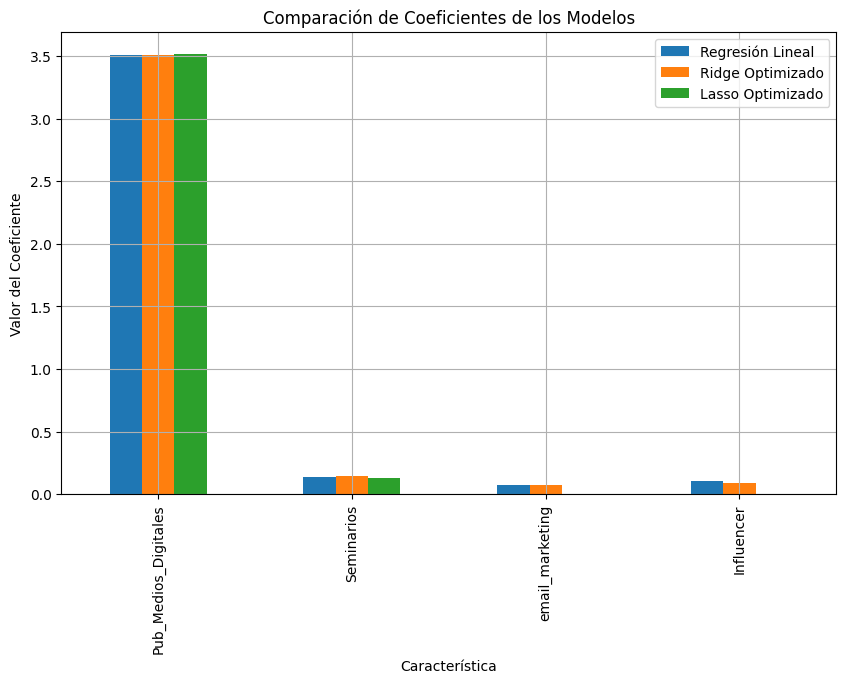

In [66]:
# Visualizar los coeficientes de los modelos
coefs = pd.DataFrame({
    'Característica': ['Pub_Medios_Digitales', 'Seminarios', 'email_marketing', 'Influencer'],
    'Regresión Lineal': linear_model.coef_,
    'Ridge Optimizado': ridge_grid.best_estimator_.coef_,
    'Lasso Optimizado': lasso_grid.best_estimator_.coef_
})

coefs.plot(kind='bar', x='Característica', figsize=(10, 6))
plt.title('Comparación de Coeficientes de los Modelos')
plt.xlabel('Característica')
plt.ylabel('Valor del Coeficiente')
plt.grid(True)
plt.show()